##### Initialization: definition of robots and coordinates

In [1]:
import numpy as np
from UAV import *
import random


#GLOBAL PARAMETERS
N_ROBOTS  = 5
DIMENSION = 2


platoon = []

# initialization of n robots
for i in range(N_ROBOTS):
    if i==0:
        i_robot = Robot("op_" + str(i),0,0,0)
    else:
        i_robot = Robot("op_" + str(i),round(random.uniform(0, 10.0),3),round(random.uniform(0, 10.0),3),0)
    platoon.append(i_robot)

coordinates = [[],[],[]]

for rob in platoon:
    coordinates = np.append(coordinates,rob.get_coords(),axis=1)

#TRUE COORDINATES [REALITY: THEY ARE UNKNOWN]
S = coordinates[0:2,:]

print(S)

[[0.    0.45  8.577 9.646 1.023]
 [0.    1.223 9.705 4.432 7.826]]


##### Definition of the (squared) distance matrix

In [2]:
DM2 = d_matrix2(platoon) #squared distance matrix -> for formulas
print(DM2)

#FROM MAPLE
#S =  np.mat([[0,0.58188e0,0.52443e1,0.80910e0,0.74124e1,0.34278e1,0.20555e-1,0.80678e1],[0,0.41613e1,0.99135e1,0.84512e1,0.90618e1,0.12757e1,0.47780e1,0.34271e1]])
#DM2 = DM_from_S(S)

[[  0.         1.698229 167.751954 112.68794   62.292805]
 [  1.698229   0.       137.992453  94.864097  43.927938]
 [167.751954 137.992453   0.        28.94729   60.593557]
 [112.68794   94.864097  28.94729    0.        85.875365]
 [ 62.292805  43.927938  60.593557  85.875365   0.      ]]


##### S* estimation through EigenValue Decomposition

In [3]:
S_star = EVD(DM2,DIMENSION)
print(S_star)

[[ 5.96127279  4.85248366 -6.77671673 -4.36408491  0.32704519]
 [-1.21825582 -0.53355466  1.1260089  -3.68299283  4.30879442]]


##### Removal of the ambiguity generated by distances in an Universal Euclidean transformation

In [5]:
#Translation removal
S_star = match_anchor(S,S_star,verbose=1)

X displacement:  0.0
Y displacement:  0.0

Displacement matrix:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


The new coordinates may be affected by rotation and flip ambiguities. Thus we must solve the problem with further analysis

##### Identification of rotation ambiguity

DM' : a new acquisition for the distances

We now introduce a displacement for the anchor, in order to build a new (squared) distance matrix.

In reality what we do is applying a displacement to the anchor and we get a new distance matrix

In [6]:
deltaX1 = 0.3
deltaY1 = 0.1

DeltaS_prime = np.array([[0 for i in range(N_ROBOTS)] for j in range(2)],dtype=float)
DeltaS_prime[:,0] = [deltaX1,deltaY1]

S_prime = S + DeltaS_prime
print(S_prime)

DM_prime = DM_from_S(S_prime,verbose=1)

[[0.3   0.45  8.577 9.646 1.023]
 [0.1   1.223 9.705 4.432 7.826]]
DM' :
 [[  0.         1.283629 160.764754 106.11394   60.213805]
 [  1.283629   0.       137.992453  94.864097  43.927938]
 [160.764754 137.992453   0.        28.94729   60.593557]
 [106.11394   94.864097  28.94729    0.        85.875365]
 [ 60.213805  43.927938  60.593557  85.875365   0.      ]]


Estimation of the rotation angle $\theta_r$

In [7]:
theta_r   = estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=1,verbose=1)
#print(estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=1,verbose=0))
#print(estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=2,verbose=0))
#print(estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=3,verbose=0))
#print(estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=4,verbose=0))
#print(estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=5,verbose=0))
#print(estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=6,verbose=0))

Coordinates to work with: 1-th and 2-th
After normalization: 
cos(theta):	-0.999768
sin(theta):	-0.021517

Actual theta:	 -3.120074411132444
Approx theta:	Disabled


S** : estimated-rotated coordinates

In [8]:
S_star2 = rotateMatrix(theta_r)@S_star

##### Identification of flip ambiguity

We have to check if there is any flip ambiguity. To do so, we have to move the anchor one more time

In [9]:
deltaX2 = 0.7
deltaY2 = 0.4

DeltaS_prime2 = np.array([[0 for i in range(N_ROBOTS)] for j in range(2)],dtype=float)
DeltaS_prime2[:,0] = [deltaX2,deltaY2]

S_prime2 = S + DeltaS_prime2
print(S_prime)

DM_prime2 = DM_from_S(S_prime2,verbose=1)

[[0.3   0.45  8.577 9.646 1.023]
 [0.1   1.223 9.705 4.432 7.826]]
DM' :
 [[  0.         0.739829 148.630154  96.28794   55.249805]
 [  0.739829   0.       137.992453  94.864097  43.927938]
 [148.630154 137.992453   0.        28.94729   60.593557]
 [ 96.28794   94.864097  28.94729    0.        85.875365]
 [ 55.249805  43.927938  60.593557  85.875365   0.      ]]


Now we estimate a second rotation angle $\theta_{r2}$: if = 0, no flip ambiguity

theta_r2 :  -0.4
Wrong estimated angle: -3.120074411132444
True  estimated angle: -0.6650193512506346
0.0


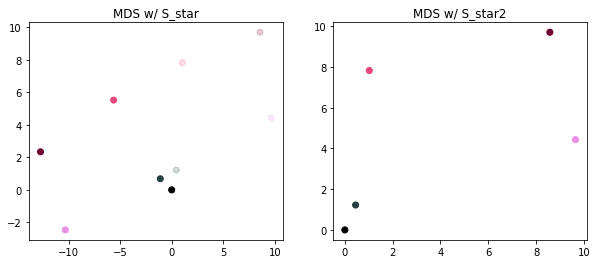

[[ 0.00000000e+00  1.02140518e-14  9.76996262e-14  4.44089210e-14
   8.17124146e-14]
 [ 0.00000000e+00 -5.99520433e-15 -9.59232693e-14 -1.09245946e-13
  -1.50990331e-14]]


In [10]:
theta_r2 = estimate_theta(DM2,DM_prime2,S_star2,[deltaX2,deltaY2],approx=2,verbose=0)
print("theta_r2 : ", theta_r2)


if (theta_r2 != 0):
  F = np.array([[-1,0],[0,1]])
    
  theta_r3 = estimate_theta(DM2,DM_prime,F@S_star,[deltaX1,deltaY1],verbose=0)

  print("Wrong estimated angle:",theta_r)
  print("True  estimated angle:", theta_r3)

  S_star2 = rotateMatrix(theta_r3)@F@S_star

print(S[1,:][0])
plot_points(S,S_star  = S_star,
              S_star2 = S_star2
            )
print(S-S_star2)



3.1631108977566504
-3.120074411132444


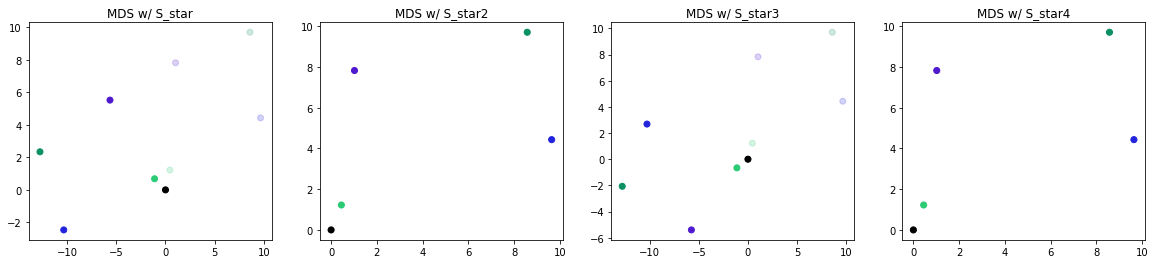

In [11]:
theta = LSE(DM2,DM_prime,S_star,[deltaX1,deltaY1])
print(theta.x)
print(theta_r)

theta_f = LSE(DM2,DM_prime,F@S_star,[deltaX1,deltaY1])

plot_points(S,S_star  = S_star,
              S_star2 = S_star2,
              S_star3 = rotateMatrix(theta.x)@F@S_star,
              S_star4 = rotateMatrix(theta_f.x)@F@S_star
            )